In [5]:
import meep as mp
import numpy as np
import math

num_drops = 100
cell_size = mp.Vector3(2,2,2)
#https://www.ijert.org/research/underwater-antenna-design-and-analysis-at-ism-band-frequency-IJERTV6IS120114.pdf
isotropic_water = mp.Medium(mu=0.999991,epsilon=81,D_conductivity=4)
shifts = np.random.rand(3,num_drops)
drop_sphere = mp.Sphere(radius=0.1, material=isotropic_water)
geometry = list()
#https://slidetodoc.com/radar-meteorology-theoretical-work-mie-scattering-theory-in/
for i in range(num_drops):
    geometry.append(drop_sphere+mp.Vector3(shifts[0,i],shifts[1,i],shifts[2,i]))

sim = mp.Simulation(resolution=100,
                    cell_size=cell_size,
                    geometry=geometry)

sim.init_sim()

eps_data = sim.get_epsilon()

-----------
Initializing structure...
time for choose_chunkdivision = 0.00019598 s
Working in 3D dimensions.
Computational cell is 2 x 2 x 2 with resolution 100
     sphere, center = (0.267648,0.879912,0.953432)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.833082,0.219843,0.55397)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.496622,0.721843,0.57307)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.970606,0.834338,0.940918)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.662091,0.894426,0.0377066)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.20197,0.601621,0.554167)
          radius 0.1
          dielectric constant epsilon diagonal = (81,81,81)
     sphere, center = (0.749499,0.482253,0.55842)

/tmp/ipykernel_5316/2345713417.py:9: UserWarning: No contour levels were found within the data range.
  s = ax.contour3D(X,Y,Z[:,:,i],cmap='YlGnBu')


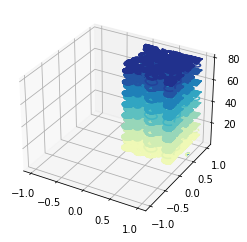

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(-1,1,200)
y = np.linspace(-1,1,200)
X, Y = np.meshgrid(x, y)
Z = eps_data
ax = plt.axes(projection='3d')
for i in range(200):
    s = ax.contour3D(X,Y,Z[:,:,i],cmap='YlGnBu')